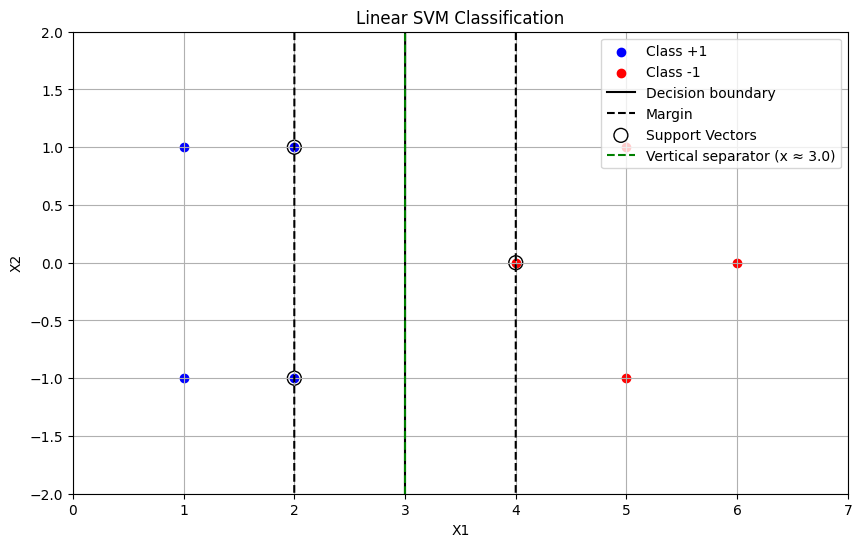

Hyperplane coefficients: w = [-9.99839446e-01  3.21107266e-04]
Hyperplane intercept: b = 2.999571856978085
Support vectors: [[ 4.  0.]
 [ 2.  1.]
 [ 2. -1.]]
Number of support vectors for each class: [1 2]


In [5]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.svm import SVC

# Data points
X = np.array([[1, 1], [2, 1], [1, -1], [2, -1], [4, 0], [5, 1], [5, -1], [6, 0]])

# Assign classes: points on left as class 1, points on right as class -1
y = np.array([1, 1, 1, 1, -1, -1, -1, -1])

# Create an SVM classifier
clf = SVC(kernel='linear', C=1000)  # Large C for hard margin

# Train the classifier
clf.fit(X, y)

# Create a figure
plt.figure(figsize=(10, 6))

# Plot the data points
plt.scatter(X[:4, 0], X[:4, 1], color='blue', label='Class +1')
plt.scatter(X[4:, 0], X[4:, 1], color='red', label='Class -1')

# Get the separating hyperplane
w = clf.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(0, 7)
yy = a * xx - (clf.intercept_[0]) / w[1]

# Plot the hyperplane
plt.plot(xx, yy, 'k-', label='Decision boundary')

# Plot the margins
margin = 1 / np.sqrt(np.sum(clf.coef_**2))
yy_down = yy - np.sqrt(1 + a**2) * margin
yy_up = yy + np.sqrt(1 + a**2) * margin
plt.plot(xx, yy_down, 'k--', label='Margin')
plt.plot(xx, yy_up, 'k--')

# Highlight support vectors
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
            s=100, facecolors='none', edgecolors='k', label='Support Vectors')

# Find the vertical line that separates the classes
x_separator = (np.max(X[:4, 0]) + np.min(X[4:, 0])) / 2
plt.axvline(x=x_separator, color='green', linestyle='--',
            label='Vertical separator (x ≈ {:.1f})'.format(x_separator))

# Set plot limits and labels
plt.xlim(0, 7)
plt.ylim(-2, 2)
plt.xlabel("X1")
plt.ylabel("X2")
plt.title("Linear SVM Classification")
plt.legend()
plt.grid(True)
plt.show()

# Print information about the hyperplane
print(f"Hyperplane coefficients: w = {clf.coef_[0]}")
print(f"Hyperplane intercept: b = {clf.intercept_[0]}")
print(f"Support vectors: {clf.support_vectors_}")
print(f"Number of support vectors for each class: {clf.n_support_}")

SVM with RBF Kernel - Accuracy: 1.0
Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


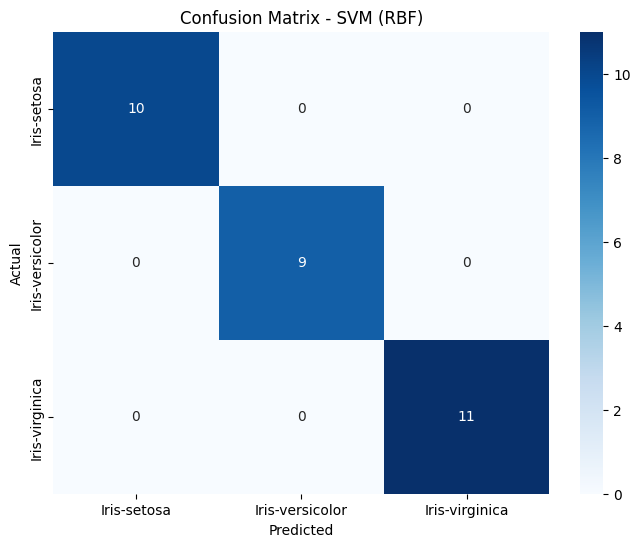


SVM with Linear Kernel - Accuracy: 1.0
Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


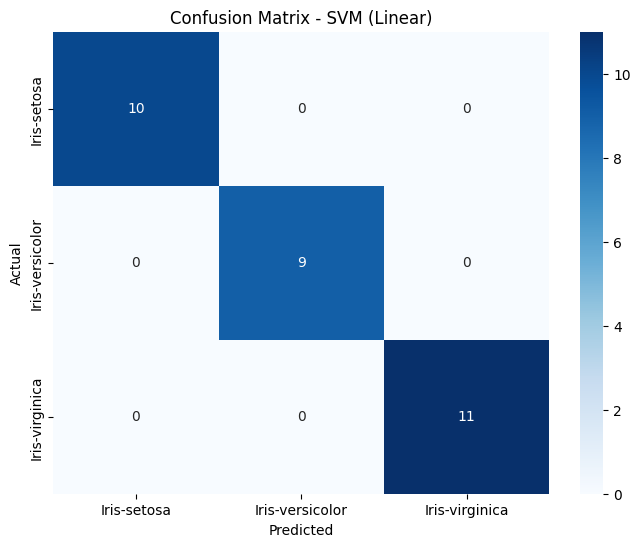

In [1]:
# prompt: To Do: Implementation – Decision Tree(for
# Classification)
# Write Python code to implement the following. Consider dataset files as “iris.csv” and “drug.csv”
# 1.
# Build a SVM classifier to classify IRIS flower dataset using the kernels RBF and linear.
# Use 80% of data for training and 20% for testing.
# Display accuracy score and confusion matrix of the trained model on test data.

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Load the Iris dataset
try:
    iris_data = pd.read_csv('sample_data/iris.csv')
except FileNotFoundError:
    print("Error: 'iris.csv' not found. Please make sure the file is in the current directory.")
    exit()


# Prepare the data
X = iris_data.drop('species', axis=1)
y = iris_data['species']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# SVM with RBF kernel
svm_rbf = SVC(kernel='rbf')
svm_rbf.fit(X_train, y_train)
y_pred_rbf = svm_rbf.predict(X_test)
accuracy_rbf = accuracy_score(y_test, y_pred_rbf)
cm_rbf = confusion_matrix(y_test, y_pred_rbf)

print(f"SVM with RBF Kernel - Accuracy: {accuracy_rbf}")
print("Confusion Matrix:")
print(cm_rbf)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_rbf, annot=True, fmt="d", cmap="Blues",
            xticklabels=iris_data['species'].unique(),
            yticklabels=iris_data['species'].unique())
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - SVM (RBF)")
plt.show()

# SVM with Linear kernel
svm_linear = SVC(kernel='linear')
svm_linear.fit(X_train, y_train)
y_pred_linear = svm_linear.predict(X_test)
accuracy_linear = accuracy_score(y_test, y_pred_linear)
cm_linear = confusion_matrix(y_test, y_pred_linear)

print(f"\nSVM with Linear Kernel - Accuracy: {accuracy_linear}")
print("Confusion Matrix:")
print(cm_linear)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_linear, annot=True, fmt="d", cmap="Blues",
            xticklabels=iris_data['species'].unique(),
            yticklabels=iris_data['species'].unique())
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - SVM (Linear)")
plt.show()


Saving letter-recognition.csv to letter-recognition.csv

✅ Accuracy on Test Set: 0.37


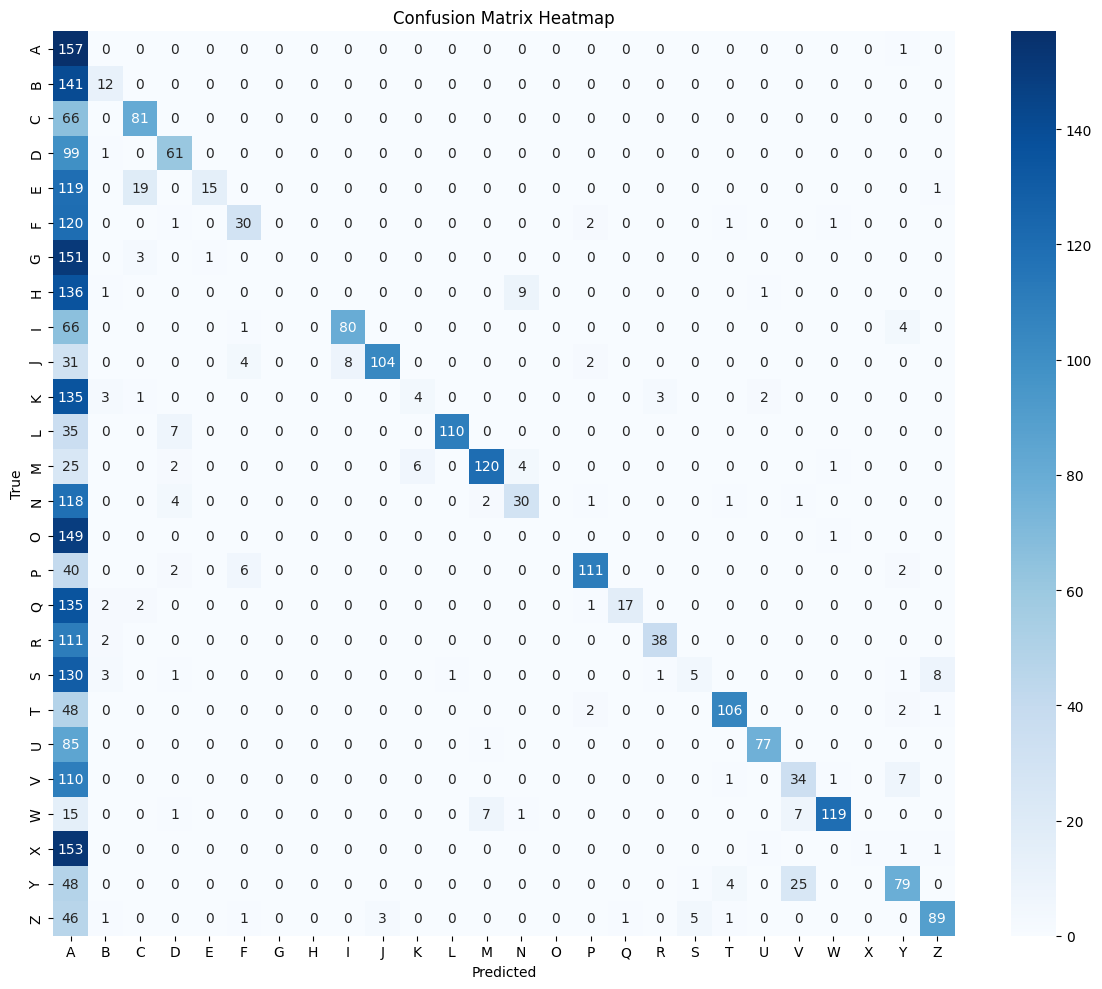

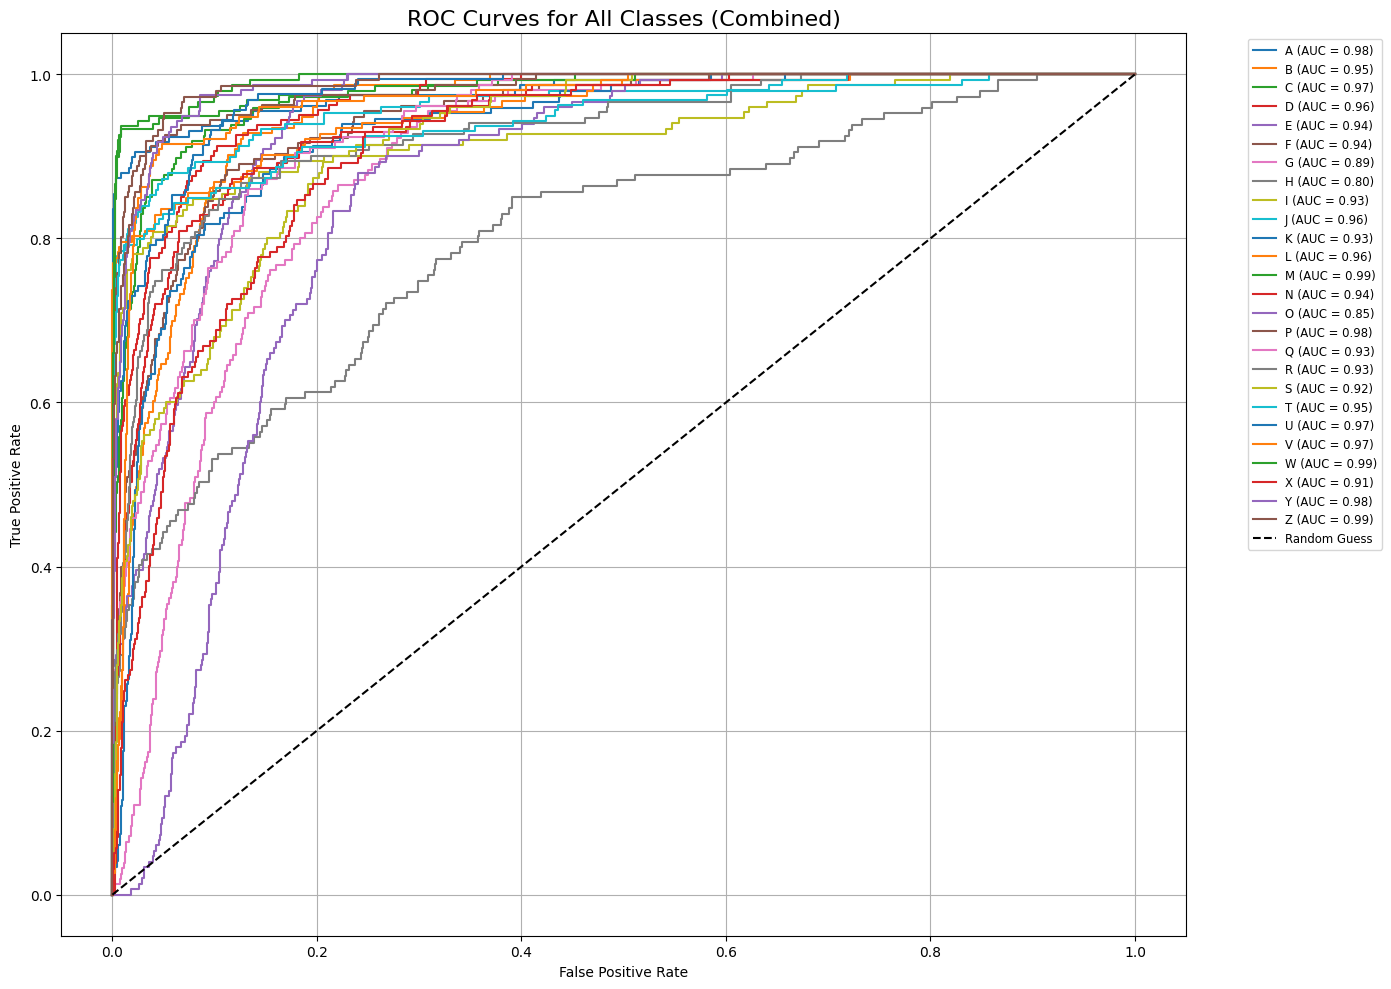

In [2]:
# Install required packages
!pip install scikit-learn matplotlib pandas seaborn

# 1. Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer, StandardScaler
from sklearn.svm import LinearSVC
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc

# 2. Upload the dataset
from google.colab import files
uploaded = files.upload()

# 3. Read CSV file
filename = list(uploaded.keys())[0]
df = pd.read_csv(filename)

# 4. Separate features and labels
X = df.drop('letter', axis=1)
y = df['letter']

# 5. Normalize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 6. Binarize the labels
lb = LabelBinarizer()
y_binarized = lb.fit_transform(y)

# 7. Train-Test SplAit
X_train, X_test, y_train, y_test, y_train_bin, y_test_bin = train_test_split(
    X_scaled, y, y_binarized, test_size=0.2, random_state=42, stratify=y
)

# 8. Train One-vs-Rest SVM classifier
model = OneVsRestClassifier(LinearSVC(random_state=42, max_iter=10000))
model.fit(X_train, y_train_bin)

# 9. Make predictions
y_pred_bin = model.predict(X_test)
y_pred = lb.inverse_transform(y_pred_bin)

# 10. Accuracy & Confusion Matrix
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred, labels=lb.classes_)

print(f"\n✅ Accuracy on Test Set: {accuracy:.2f}")

# Plot Confusion Matrix as Heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=lb.classes_, yticklabels=lb.classes_)
plt.title('Confusion Matrix Heatmap')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.tight_layout()
plt.show()

# 11. ROC Curve + AUC (combined in one plot)
y_score = model.decision_function(X_test)
fpr, tpr, roc_auc = {}, {}, {}
n_classes = len(lb.classes_)

plt.figure(figsize=(14, 10))
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    plt.plot(fpr[i], tpr[i], lw=1.5, label=f'{lb.classes_[i]} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=1.5, label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for All Classes (Combined)', fontsize=16)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize='small')
plt.grid(True)
plt.tight_layout()
plt.show()


In [3]:
# Step 1: Create and save the dataset to a CSV
import pandas as pd

data = {
    "Height": [44, 52.1, 57, 71, 77, 72.2, 68.2, 55.2, 56, 65],
    "Weight": [126.3, 169.2, 160, 187.6, 197.4, 108.2, 127.8, 143.2, 132.6, 189],
    "Label": ["Horse", "Horse", "Horse", "Horse", "Horse", "Mule", "Mule", "Mule", "Mule", "Mule"]
}

df = pd.DataFrame(data)
df.to_csv("horses_mules.csv", index=False)
print("CSV file saved successfully!")


CSV file saved successfully!


Accuracy: 90.00%
Support Vectors:
 [[ 44.  126.3]
 [ 57.  160. ]
 [ 77.  197.4]
 [ 55.2 143.2]
 [ 56.  132.6]
 [ 65.  189. ]]


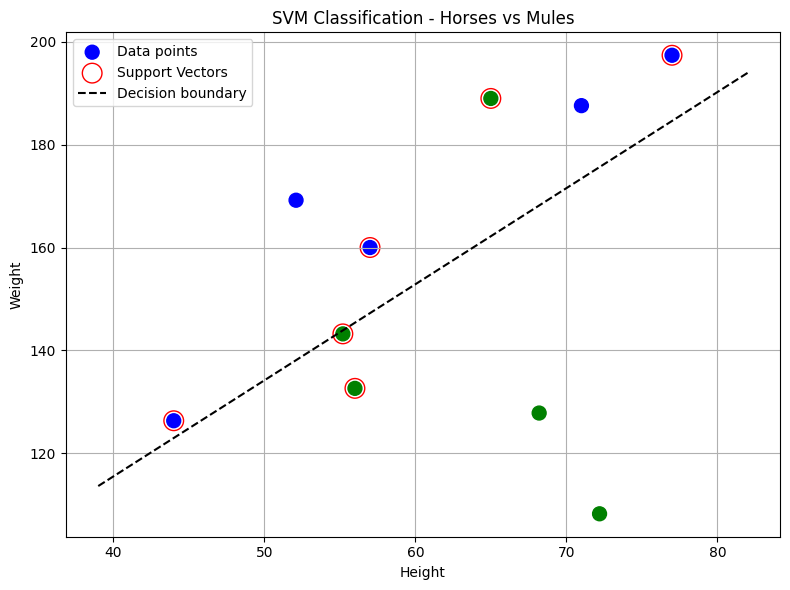

In [4]:
# Step 2–5: Import, Train, Plot, Show Accuracy and Support Vectors
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
import numpy as np

# Load the dataset
df = pd.read_csv("horses_mules.csv")

# Encode labels (Horse = 0, Mule = 1)
le = LabelEncoder()
df['LabelEncoded'] = le.fit_transform(df['Label'])

X = df[['Height', 'Weight']]
y = df['LabelEncoded']

# Train SVM
model = SVC(kernel='linear')
model.fit(X, y)

# Predict and get accuracy
y_pred = model.predict(X)
acc = accuracy_score(y, y_pred)
print(f"Accuracy: {acc*100:.2f}%")

# Get support vectors
support_vectors = model.support_vectors_
print("Support Vectors:\n", support_vectors)

# Plot data points and decision boundary
plt.figure(figsize=(8,6))
colors = ['blue' if label == 0 else 'green' for label in y]
plt.scatter(X['Height'], X['Weight'], c=colors, s=100, label="Data points")
plt.scatter(support_vectors[:, 0], support_vectors[:, 1], s=200, facecolors='none', edgecolors='r', label='Support Vectors')

# Plot decision boundary
w = model.coef_[0]
b = model.intercept_[0]
x_points = np.linspace(min(X['Height'])-5, max(X['Height'])+5)
y_points = -(w[0] * x_points + b) / w[1]
plt.plot(x_points, y_points, 'k--', label='Decision boundary')

plt.xlabel('Height')
plt.ylabel('Weight')
plt.title('SVM Classification - Horses vs Mules')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

